In [2]:
#Check bucket contents

!aws s3 ls s3://group3-appendicitis-bucket/ --recursive

2025-11-26 20:55:57          0 data/
2025-11-29 05:30:48     136002 data/X_clean.csv
2025-11-29 05:30:48      33192 data/y_clean.csv
2025-11-27 20:01:06     200412 models/automl_best_model.pkl
2025-11-26 20:56:07          0 results/
2025-11-27 19:48:16       4266 results/feature_importances_top30.csv
2025-11-27 19:48:16        723 results/model_metrics_summary.csv
2025-11-27 19:48:16       1936 results/test_predictions_all_models.csv
2025-11-26 20:56:21          0 visuals/


In [4]:
#Folder for storing visuals we generate
!mkdir -p visuals

In [5]:
#Download the necessary csvs

!aws s3 cp s3://group3-appendicitis-bucket/results/feature_importances_top30.csv .
!aws s3 cp s3://group3-appendicitis-bucket/results/model_metrics_summary.csv .
!aws s3 cp s3://group3-appendicitis-bucket/results/test_predictions_all_models.csv .

download: s3://group3-appendicitis-bucket/results/feature_importances_top30.csv to ./feature_importances_top30.csv
download: s3://group3-appendicitis-bucket/results/model_metrics_summary.csv to ./model_metrics_summary.csv
download: s3://group3-appendicitis-bucket/results/test_predictions_all_models.csv to ./test_predictions_all_models.csv


In [6]:
import pandas as pd

feature_importance = pd.read_csv("feature_importances_top30.csv")
metrics = pd.read_csv("model_metrics_summary.csv")
predictions = pd.read_csv("test_predictions_all_models.csv")

print(feature_importance.head())
print(metrics.head())
print(predictions.head())

  model_id     model_name         feature  importance  source  \
0      rfc  Random Forest             Age    0.027116  manual   
1      rfc  Random Forest             BMI    0.027502  manual   
2      rfc  Random Forest          Height    0.026554  manual   
3      rfc  Random Forest          Weight    0.023550  manual   
4      rfc  Random Forest  Length_of_Stay    0.112895  manual   

   rank_within_model  
0               11.0  
1               10.0  
2               12.0  
3               16.0  
4                2.0  
     model_id                         model_name    type  test_accuracy  \
0          lr                Logistic Regression  manual       0.891026   
1        mlpc                      MLPClassifier  manual       0.858974   
2         rfc                      Random Forest  manual       0.923077   
3        hgbc               HistGradientBoosting  manual       0.948718   
4  automl_gbc  AutoML GradientBoostingClassifier  automl       0.935897   

   test_f1_macro  te

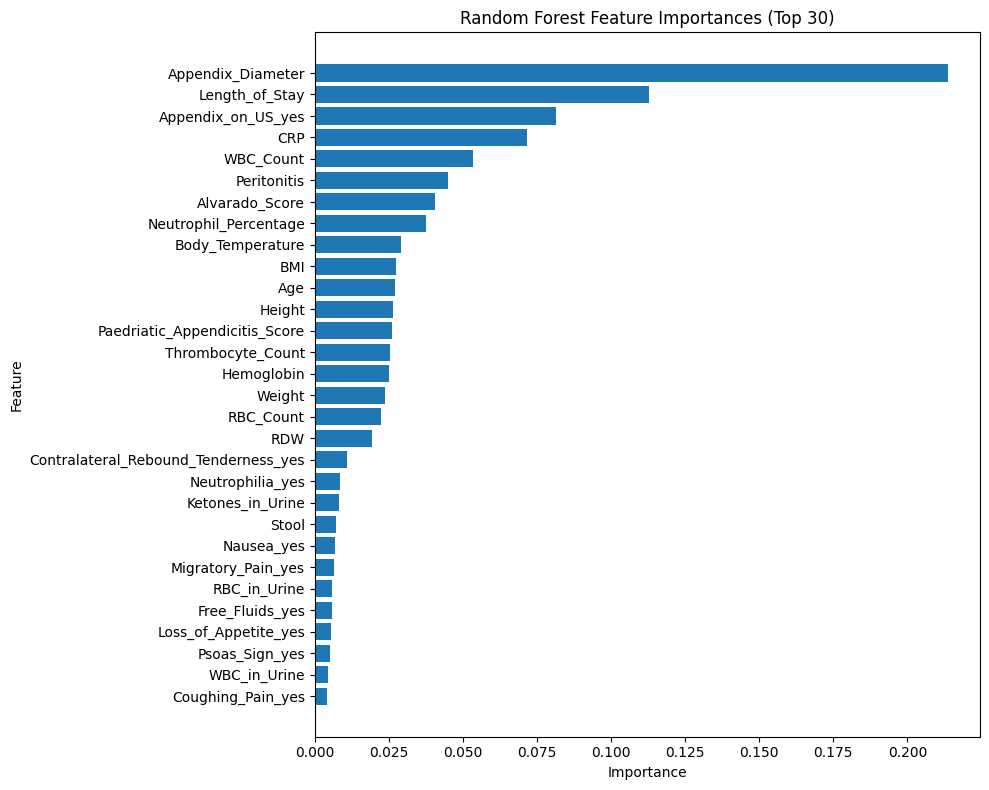

In [7]:
import matplotlib.pyplot as plt

fi_rfc = feature_importance[feature_importance["model_id"] == "rfc"].sort_values("importance", ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(fi_rfc["feature"], fi_rfc["importance"])
plt.title("Random Forest Feature Importances (Top 30)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("visuals/rf_feature_importances.png", dpi = 300)
plt.show()


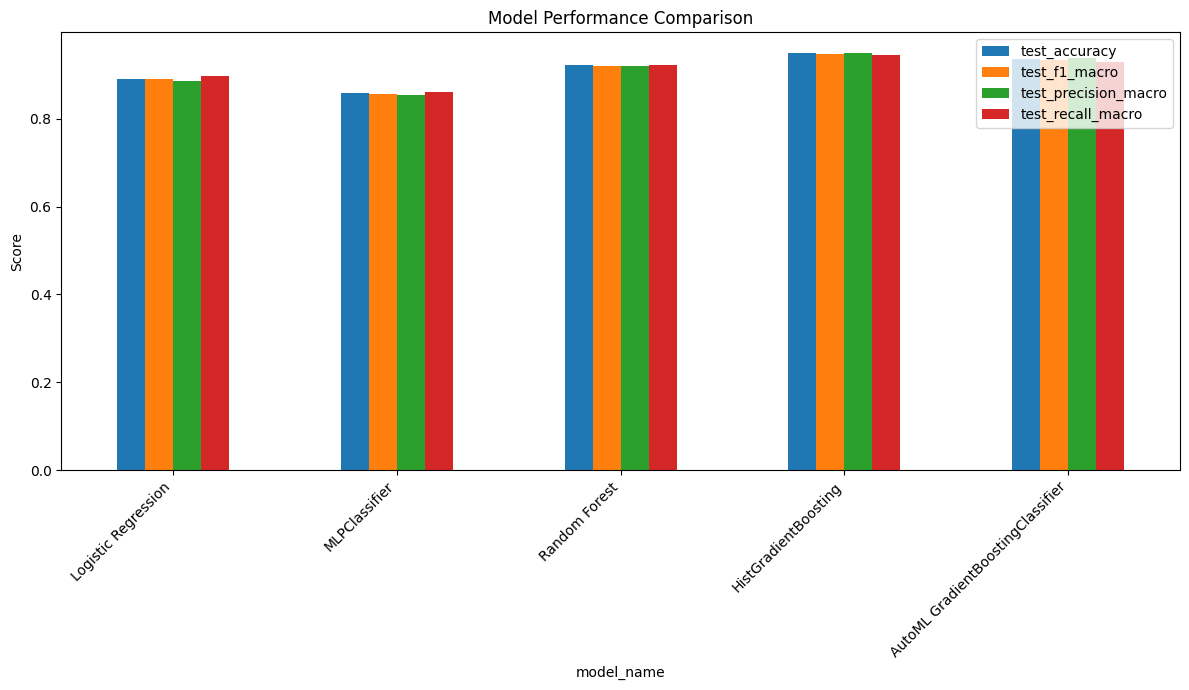

In [8]:
#Visualization for metrics across models
metrics_plot = metrics.set_index("model_name")[["test_accuracy", "test_f1_macro", "test_precision_macro", "test_recall_macro"]]
metrics_plot.plot(kind="bar", figsize=(12,7))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("visuals/Model_comparisons.png", dpi = 300)
plt.show()

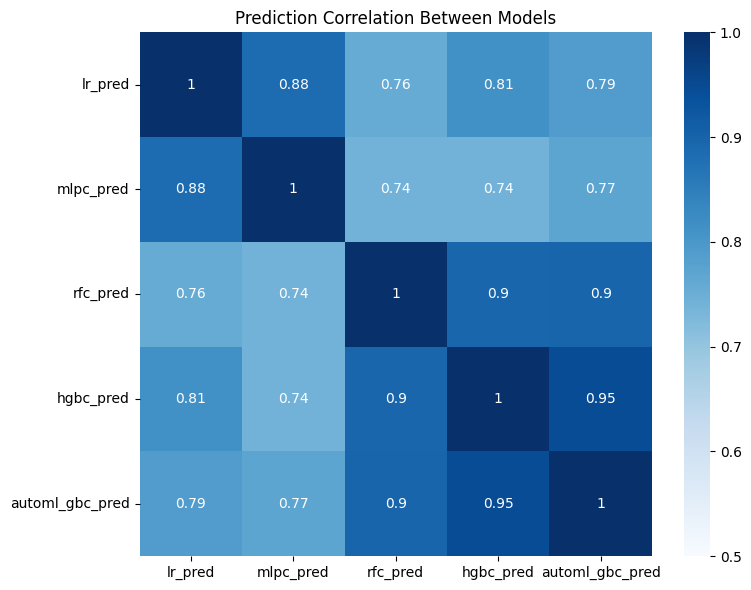

In [9]:
#Visualization for prediction correlation of models

import seaborn as sns
import numpy as np

pred_cols = ["lr_pred", "mlpc_pred", "rfc_pred", "hgbc_pred", "automl_gbc_pred"]
corr = predictions[pred_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="Blues", vmin=0.5, vmax=1)
plt.title("Prediction Correlation Between Models")
plt.tight_layout()
plt.savefig("visuals/Prediction_correlation.png", dpi=300)
plt.show()



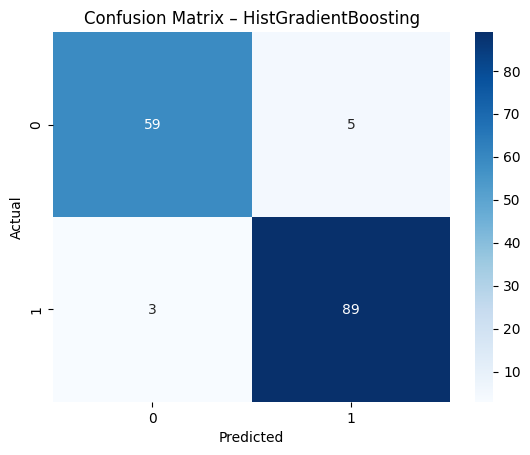

In [10]:
#Confusion matrix of our best model

from sklearn.metrics import confusion_matrix
import seaborn as sns

best_model_preds = predictions["hgbc_pred"]
cm = confusion_matrix(predictions["true_label"], best_model_preds)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – HistGradientBoosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("visuals/Confusion_matrix_hgbc", dpi=300)
plt.show()



In [11]:
#Copy into visuals folder in s3 bucket
!aws s3 cp visuals/rf_feature_importances.png s3://group3-appendicitis-bucket/visuals/
!aws s3 cp visuals/Prediction_correlation.png s3://group3-appendicitis-bucket/visuals/
!aws s3 cp visuals/Confusion_matrix_hgbc.png s3://group3-appendicitis-bucket/visuals/
!aws s3 cp visuals/Model_comparisons.png s3://group3-appendicitis-bucket/visuals/


upload: visuals/rf_feature_importances.png to s3://group3-appendicitis-bucket/visuals/rf_feature_importances.png
upload: visuals/Prediction_correlation.png to s3://group3-appendicitis-bucket/visuals/Prediction_correlation.png
upload: visuals/Confusion_matrix_hgbc.png to s3://group3-appendicitis-bucket/visuals/Confusion_matrix_hgbc.png
upload: visuals/Model_comparisons.png to s3://group3-appendicitis-bucket/visuals/Model_comparisons.png


In [12]:
!aws s3 ls s3://group3-appendicitis-bucket/visuals/

2025-11-26 20:56:21          0 
2025-11-29 16:41:43      69677 Confusion_matrix_hgbc.png
2025-11-29 16:41:44     218117 Model_comparisons.png
2025-11-29 16:41:43     145467 Prediction_correlation.png
2025-11-29 16:41:42     286871 rf_feature_importances.png
